In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/COVID clinical trials.csv')

In [3]:
print(df.head())
print(df.info())
print(df.describe())
print(df.describe(include='object'))

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [26]:
df.shape

(5783, 25)

In [4]:
print(df.isnull().sum())
df = df.drop(columns=['Acronym', 'Study Documents'])
df['Results First Posted'].fillna('Unknown', inplace=True)

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64


/tmp/ipython-input-4-124190052.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Results First Posted'].fillna('Unknown', inplace=True)


Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


<Axes: title={'center': 'Status of Clinical Trials'}, xlabel='Status'>

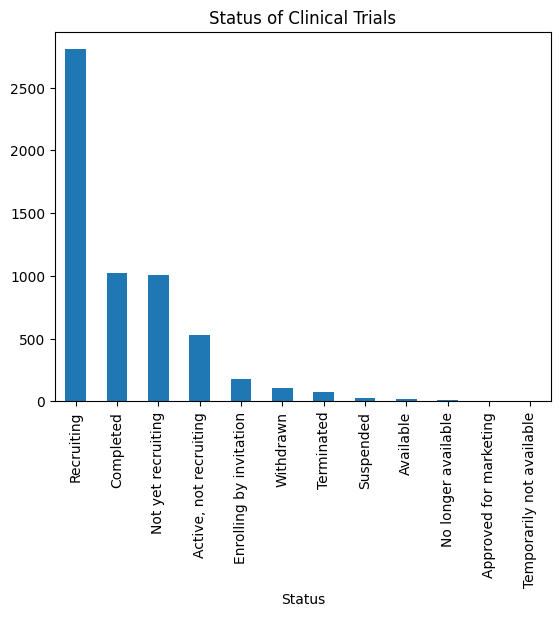

In [6]:
print(df['Status'].value_counts())
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials')

Phases
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Phases'}, xlabel='Phases'>

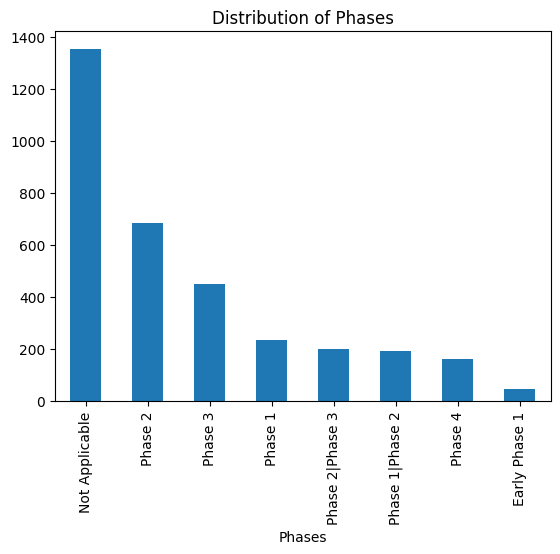

In [7]:
print(df['Phases'].value_counts())
df['Phases'].value_counts().plot(kind='bar',title='Distribution of Phases')

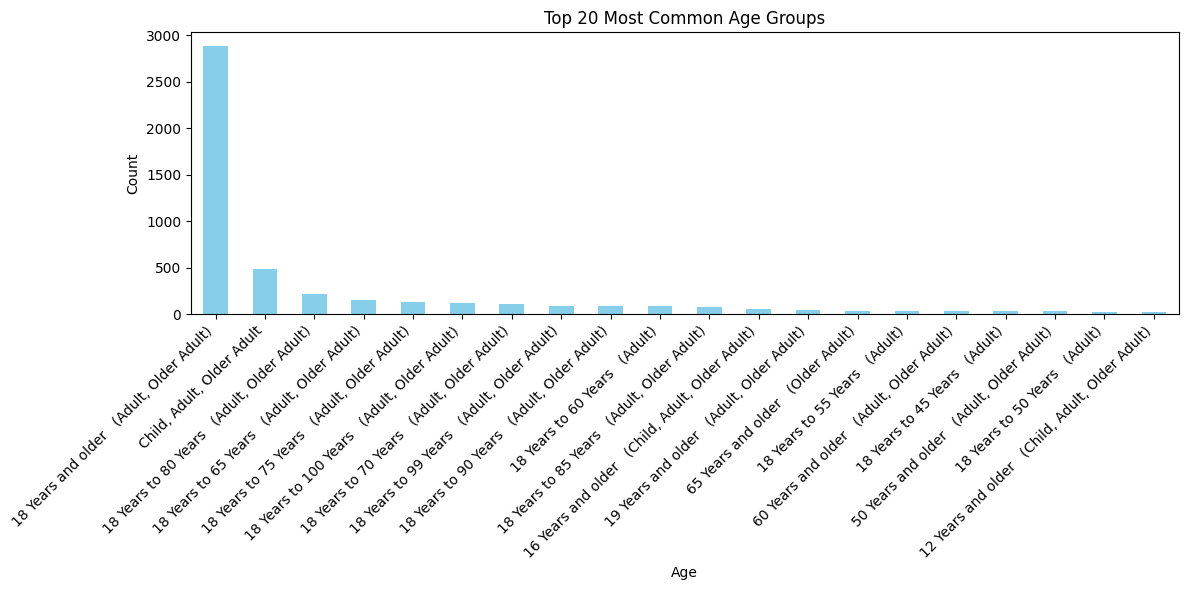

In [11]:
import matplotlib.pyplot as plt

# Get top 20 age values for a cleaner plot
top_ages = df['Age'].value_counts().head(20)

plt.figure(figsize=(12, 6))  # Wider figure
top_ages.plot(kind='bar', color='skyblue')

plt.title('Top 20 Most Common Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Better angle and alignment
plt.tight_layout()
plt.show()



Phases                   Early Phase 1  Not Applicable  Phase 1  \
Status                                                            
Active, not recruiting               7             111       44   
Completed                            3             226       38   
Enrolling by invitation              4              54        1   
Not yet recruiting                   5             282       42   
Recruiting                          22             647       98   
Suspended                            2               2        0   
Terminated                           0              13        4   
Withdrawn                            3              19        7   

Phases                   Phase 1|Phase 2  Phase 2  Phase 2|Phase 3  Phase 3  \
Status                                                                        
Active, not recruiting                26       81               15       59   
Completed                             17       78               20       56   
Enrolling by 

<Axes: title={'center': 'Status vs.Phases'}, xlabel='Status'>

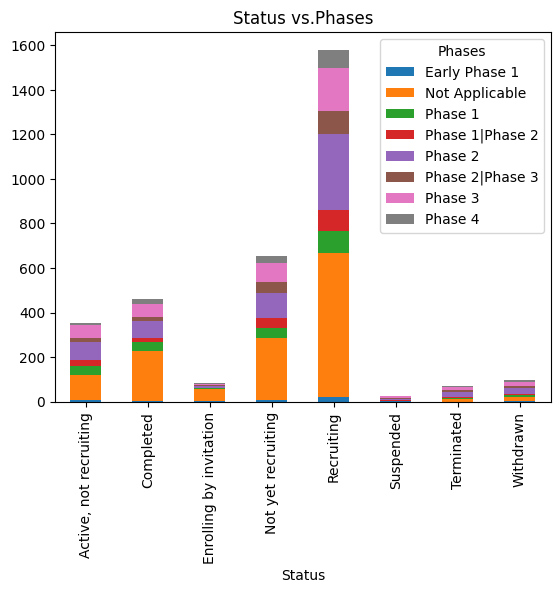

In [12]:
status_phase = pd.crosstab(df['Status'], df['Phases'])
print(status_phase)
status_phase.plot(kind='bar', stacked=True, title='Status vs.Phases')

In [14]:
conditions_outcomes = df.groupby('Conditions')['Outcome Measures'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
print(conditions_outcomes)

                                             Conditions  \
0                                2019 Novel Coronavirus   
1                      2019 Novel Coronavirus Infection   
2     2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                      2019 Novel Coronavirus Pneumonia   
4             2019 Novel Coronavirus Pneumonia|COVID-19   
...                                                 ...   
3062                  the Lung Complication of COVID-19   
3063  the Prognostic Value of Ferritin|Glycosylated ...   
3064  the Study Focus on the Uses of Telephone and O...   
3065  the Use of Modern Technology Applications in H...   
3066  to Predict an Unfavorable Evolution of Covid-1...   

                                       Outcome Measures  
0     Proportion of participants who improve by at l...  
1     new-onset COVID-19|Number of Participants with...  
2     Number of participants with treatment emergent...  
3     Clinical recovery time|Complete fever time|Cou...  
4

<Axes: title={'center': 'Trials Started Over Time'}, xlabel='Start Date'>

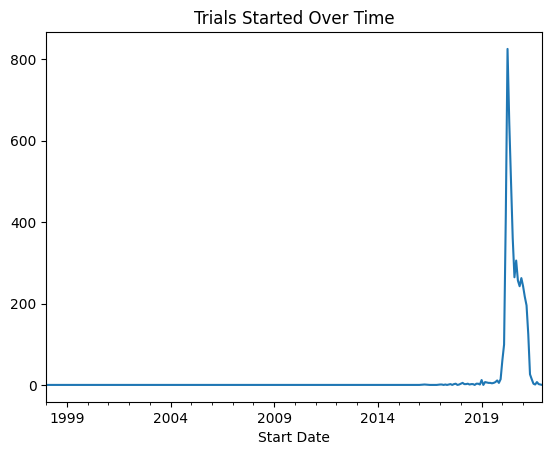

In [15]:
df['Start Date'] = pd.to_datetime(df['Start Date'],errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')
df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Trials Started Over Time')

In [21]:
def visualize_data(data , caption = '' , ylabel = 'Percentage of Mising Data'):
    sns.set(rc={'figure.figsize':(15,8.27)})
    plt.xticks(rotation=90)
    fig = sns.barplot(x = data.keys()[:min(40 ,
    len(data))].tolist() , y = data.values[: min(40 ,
    len(data))].tolist()) \
    .set_title(caption)
    plt.ylabel(ylabel)

    plt.show()

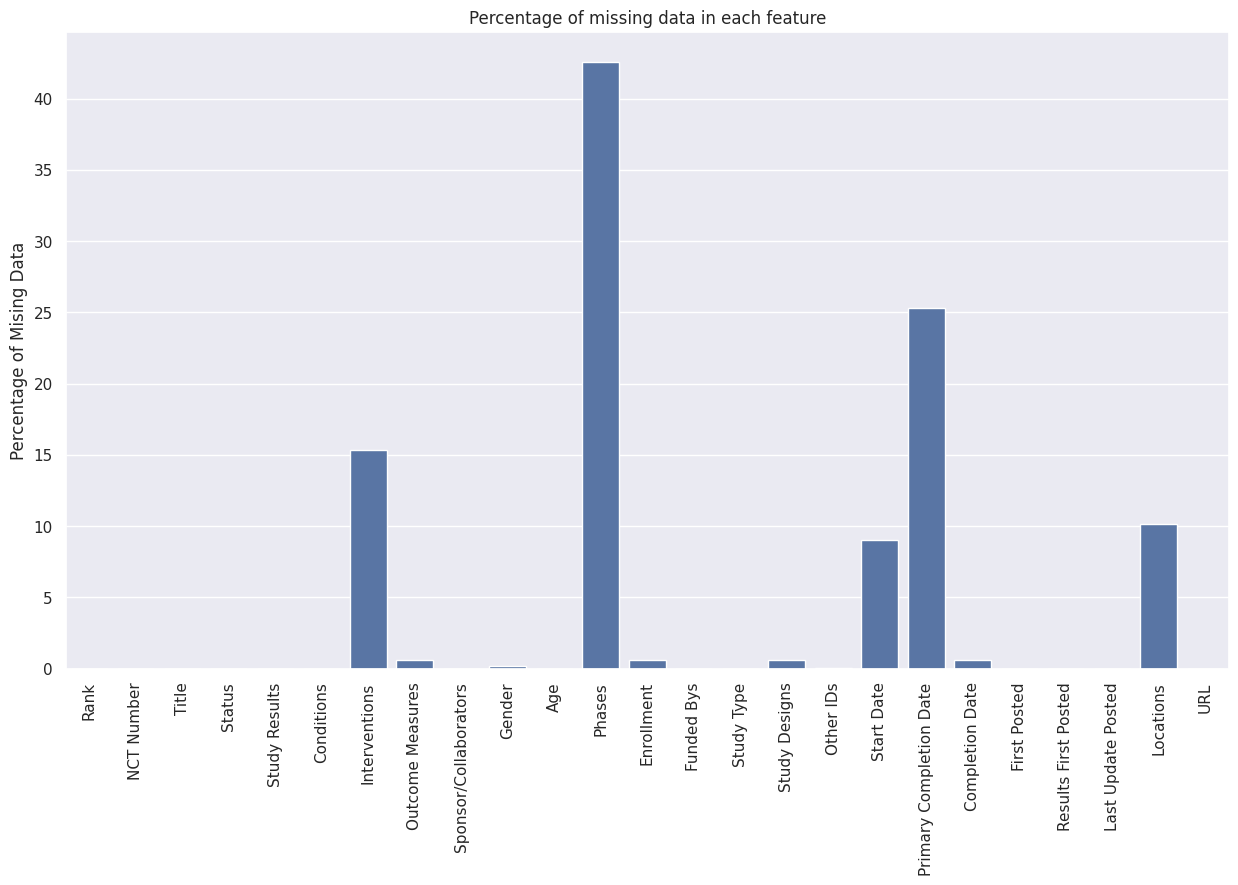

In [24]:
visualize_data(missing_data , 'Percentage of missing data in each feature')

In [23]:
missing_data = df.isnull().sum() / len(df) * 100
print(missing_data)

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  8.991873
Primary Completion Date    25.280996
Completion Date             0.622514
First Posted                0.000000
Results First Posted        0.000000
Last Update Posted          0.000000
Locations                  10.115857
URL                         0.000000
dtype: float64


In [28]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Status', 'Study Results', 'Conditions',
       'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender',
       'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type',
       'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date',
       'Completion Date', 'First Posted', 'Results First Posted',
       'Last Update Posted', 'Locations', 'URL'],
      dtype='object')

In [31]:
print(f"Shape before dropping Null rows {df.shape}")
df.dropna(axis = 0 , thresh = 10 , inplace =True)
print(f"Shape after dropping Null rows {df.shape}")

Shape before dropping Null rows (5783, 25)
Shape after dropping Null rows (5783, 25)


In [32]:
df.isnull().mean() * 100

,0
Rank,0.000000
NCT Number,0.000000
Title,0.000000
Status,0.000000
Study Results,0.000000
Conditions,0.000000
Interventions,15.320768
Outcome Measures,0.605222
Sponsor/Collaborators,0.000000
Gender,0.172921


In [33]:
countries = [ str(df.Locations.iloc[i]).split(',')[-1] for i in range(df.shape[0])]
df['Country'] = countries

In [34]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Status', 'Study Results', 'Conditions',
       'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender',
       'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type',
       'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date',
       'Completion Date', 'First Posted', 'Results First Posted',
       'Last Update Posted', 'Locations', 'URL', 'Country'],
      dtype='object')

In [35]:
df.Country.value_counts()[:35]

,count
Country,
United States,1267
France,647
nan,585
United Kingdom,306
Italy,235
Spain,234
Turkey,219
Canada,202
Egypt,192


In [37]:
print(f"Number of unique values is {df['Other IDs'].nunique()} \n")
df['Other IDs'].value_counts()

Number of unique values is 5734 



,count
Other IDs,
COVID-19,6
1,5
001,4
0001,4
002,4
...,...
68/2020,1
INCB 18424-MA-COVID-19-301,1
CI/HRAEZ2020/05,1


In [46]:
(df.isnull().groupby(df.Country).mean().sort_values(by = [], ascending = False) * 100)[:60]

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,URL,Country
Country,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,14.893617,0.000000,0.0,0.000000,...,0.0,0.000000,6.382979,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,7.692308,0.000000,0.0,0.000000,...,0.0,3.846154,38.461538,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,0.0,0.0,0.0,0.0,13.793103,0.000000,0.0,0.000000,...,0.0,0.000000,17.241379,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Bahrain,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,0.000000,0.0,0.000000,...,0.0,10.000000,20.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Barbados,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='Density'>

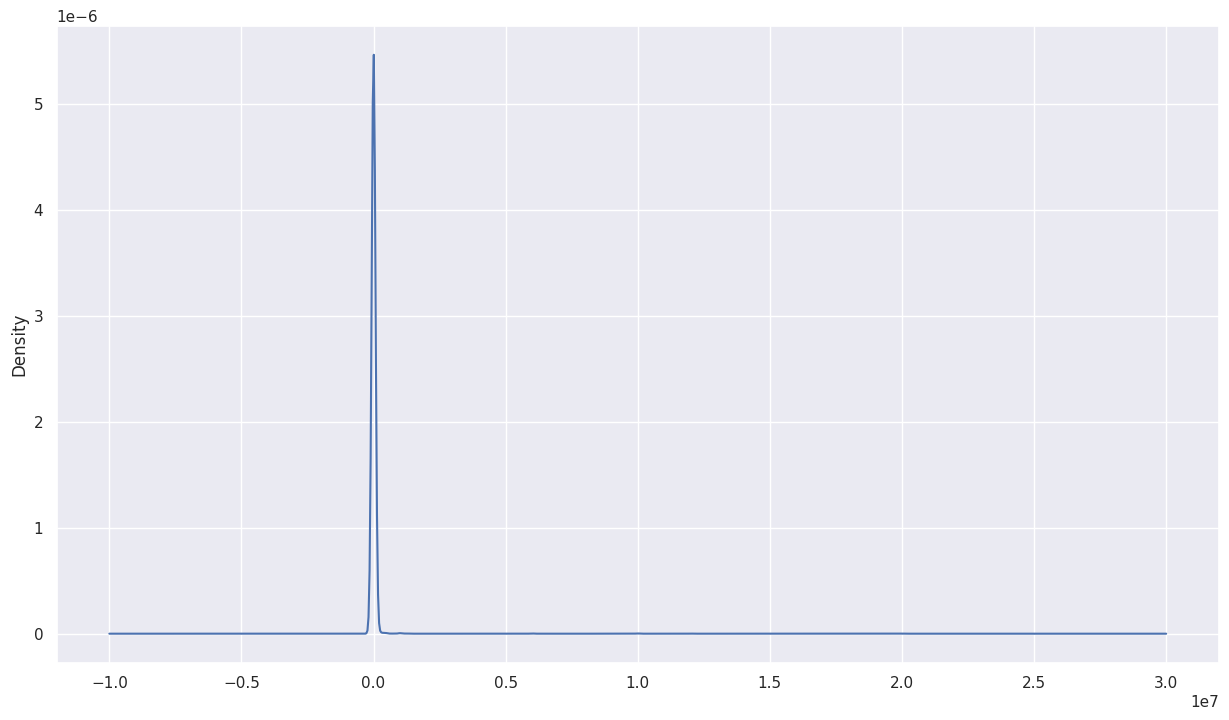

In [49]:
df.Enrollment.plot(kind = 'kde')

In [50]:
min_Value = df.Enrollment.min()
max_Value = df.Enrollment.max()
mean_Value = df.Enrollment.mean()

median_Value = df.Enrollment.median()
std_Value = df.Enrollment.std()

print(f"the min value is {min_Value} \n \
The max value is {max_Value} \n \
The mean is {mean_Value} \n \
The Median is {median_Value} \n \
Standard Devation is {std_Value}")

the min value is 0.0 
 The max value is 20000000.0 
 The mean is 18319.48860671421 
 The Median is 170.0 
 Standard Devation is 404543.7287841073


In [51]:
df.Enrollment = df.Enrollment.fillna(median_Value)

In [52]:
df.isnull().mean() * 100

,0
Rank,0.000000
NCT Number,0.000000
Title,0.000000
Status,0.000000
Study Results,0.000000
Conditions,0.000000
Interventions,15.320768
Outcome Measures,0.605222
Sponsor/Collaborators,0.000000
Gender,0.172921


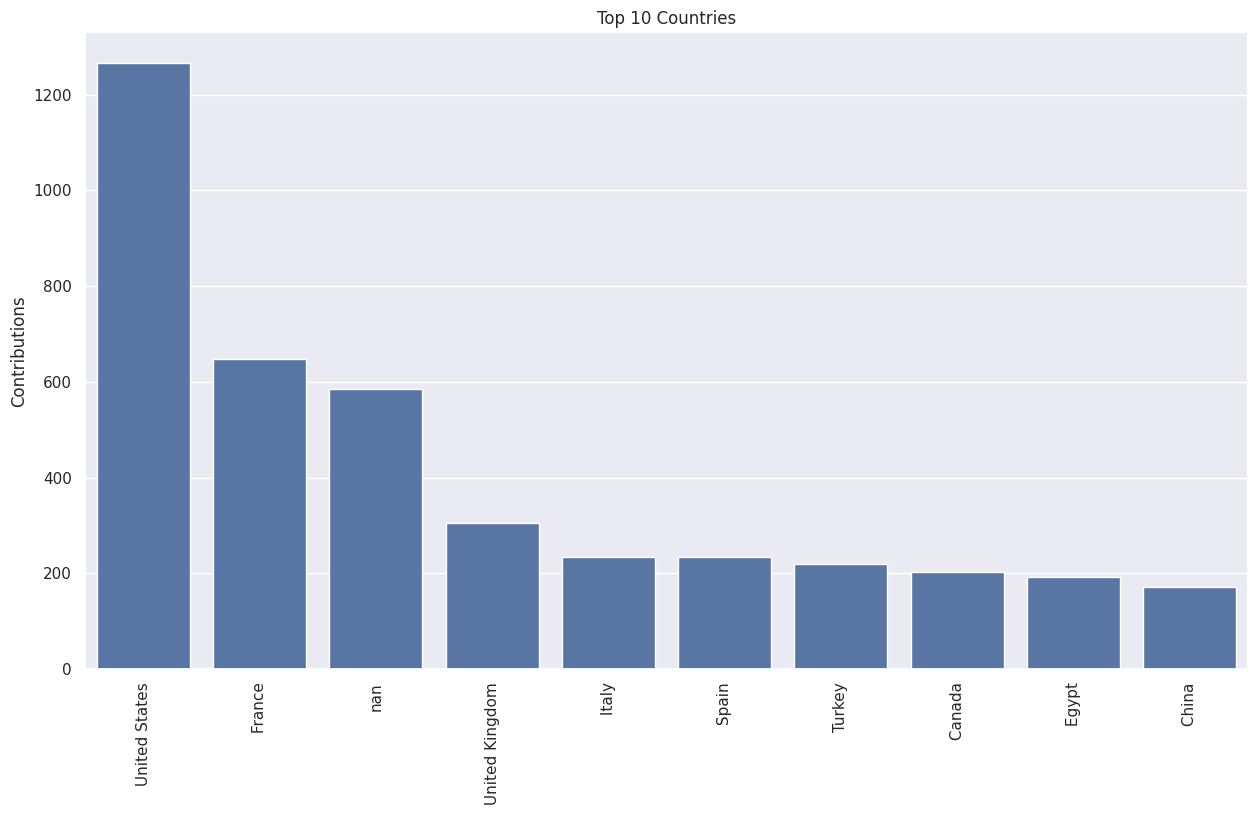

In [55]:
top_10_Countires = df.Country.value_counts()[:10]
visualize_data(top_10_Countires , caption = 'Top 10 Countries', ylabel = 'Contributions')

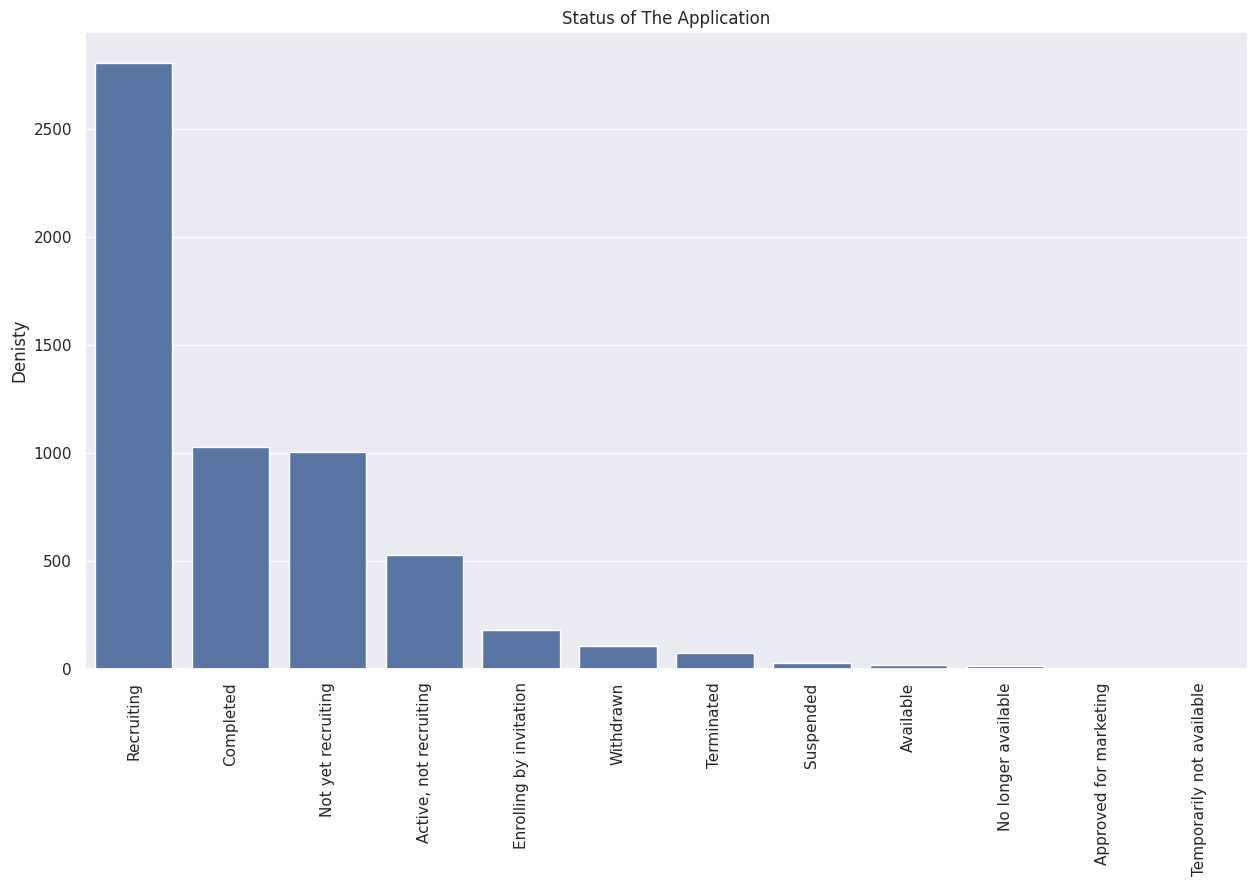

In [56]:
status = df.Status.value_counts()

visualize_data(status , caption = 'Status of The Application' , ylabel = 'Denisty')

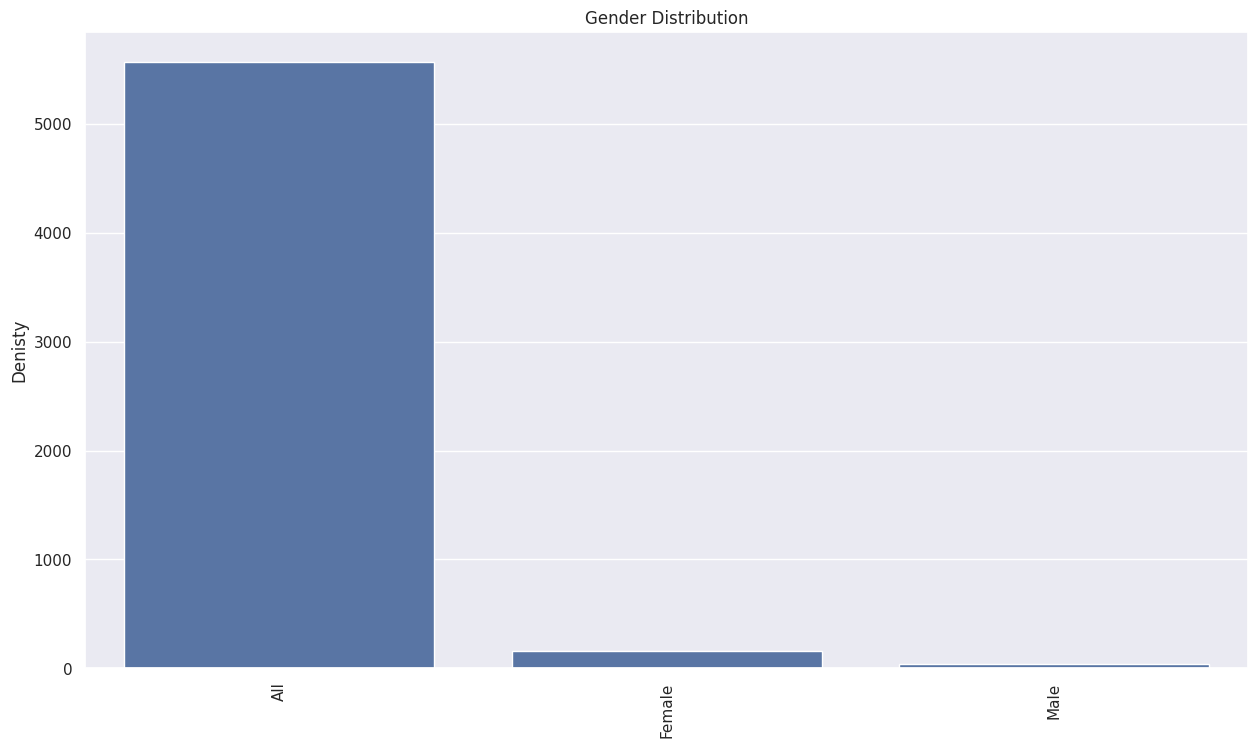

In [57]:
gender = df.Gender.value_counts()
visualize_data(gender , caption = 'Gender Distribution' ,ylabel = 'Denisty')

/tmp/ipython-input-74-29369986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')


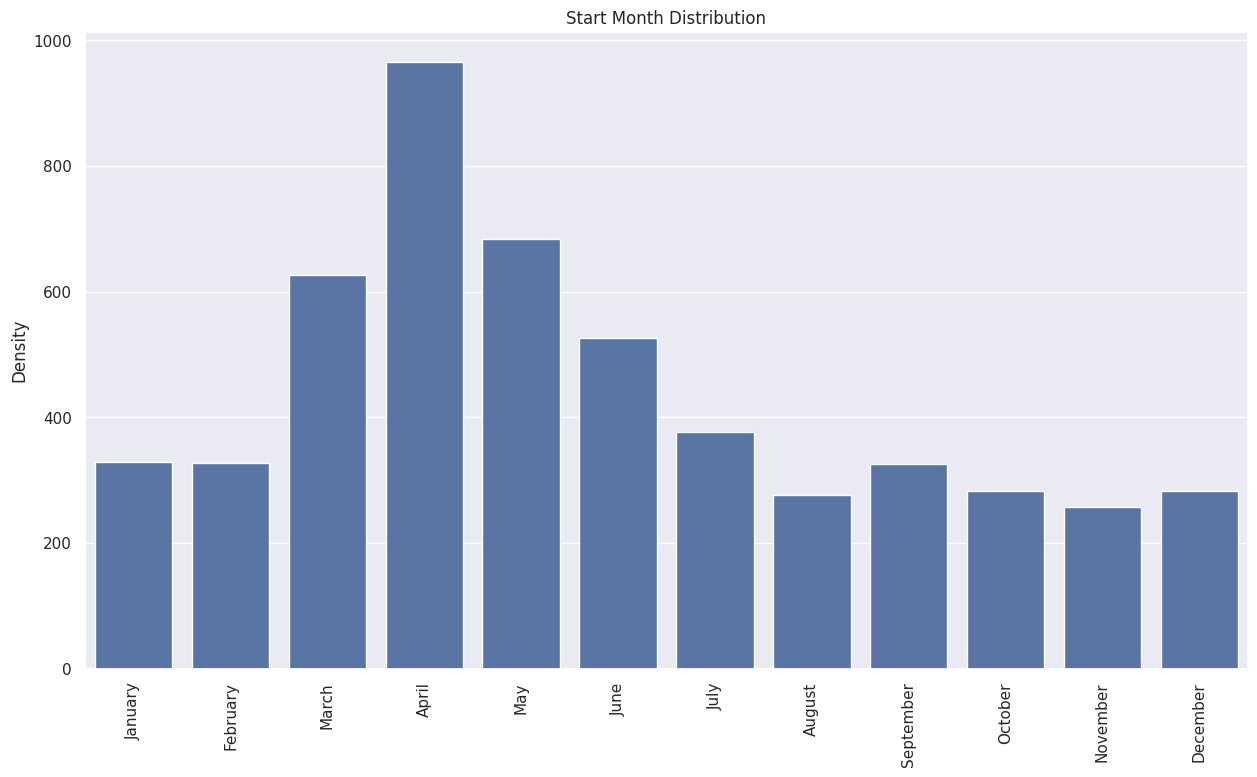

In [74]:
import pandas as pd
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df = df.dropna(subset=['Start Date'])
start_month_names = df['Start Date'].dt.month_name()
start_month_distribution = start_month_names.value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
start_month_distribution = start_month_distribution.reindex(month_order).dropna()
visualize_data(start_month_distribution, caption='Start Month Distribution', ylabel='Density')
